In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option("display.precision", 10)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)


In [2]:
df=pd.read_csv('Dataset/final_data.csv')

In [3]:
df.isnull().sum()

State_Name       0
Crop_Year        0
Crop             0
Area             0
Avg_Temp         0
Avg_Rain         0
Production    3672
states_id        0
crop_id          0
dtype: int64

In [4]:
df['Production'].replace(np.nan,0, inplace=True)

In [5]:
df.isnull().sum()

State_Name    0
Crop_Year     0
Crop          0
Area          0
Avg_Temp      0
Avg_Rain      0
Production    0
states_id     0
crop_id       0
dtype: int64

In [6]:
df.describe()

,Crop_Year,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id
count,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000,240442.000
mean,2005.655,11946.438,24.809,1121.037,585758.598,19.998,26.940
std,4.953,50856.175,0.255,92.857,17133603.708,10.706,17.823
min,1997.000,0.040,24.100,920.800,0.000,1.000,1.000
25%,2002.000,80.000,24.660,1071.300,75.000,12.000,15.000
50%,2006.000,565.000,24.740,1132.000,674.000,20.000,24.000
75%,2010.000,4279.750,25.060,1200.500,6589.000,31.000,36.000
max,2015.000,8580100.000,26.130,1243.500,1250800000.000,35.000,123.000


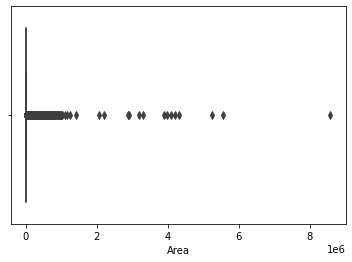

In [7]:
sns.boxplot(df['Area'])

In [8]:
# Prodcution outliers
IQR=6677.000-76.000
upper_bound=(1.5*IQR)+6677.000
lower_bound=76.000-(1.5*IQR)
print(upper_bound)
print(lower_bound)

16578.5
-9825.5


In [9]:
# Area outliers
IQR_a=4420.000-81.000
upper_bound_a=(1.5*IQR_a)+4420.000
lower_bound_a=81.000-(1.5*IQR_a)
print(upper_bound_a)
print(lower_bound_a)

10928.5
-6427.5


In [10]:
df=df[df.Production <=16578.5 ]

In [11]:
df=df[df.Area <=10928.5 ]

In [12]:
df.describe()

,Crop_Year,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id
count,189751.000,189751.000,189751.000,189751.000,189751.000,189751.000,189751.000
mean,2005.729,1153.454,24.813,1120.328,1479.136,19.871,28.431
std,4.923,2007.001,0.253,93.314,2755.201,10.790,17.579
min,1997.000,0.040,24.100,920.800,0.000,1.000,1.000
25%,2002.000,46.000,24.660,1071.300,39.000,11.000,17.000
50%,2006.000,255.000,24.740,1132.000,281.000,20.000,26.000
75%,2010.000,1202.000,25.060,1200.500,1480.000,31.000,38.000
max,2015.000,10927.000,26.130,1243.500,16574.000,35.000,123.000


In [13]:
df.columns

Index(['State_Name', 'Crop_Year', 'Crop', 'Area', 'Avg_Temp', 'Avg_Rain',
       'Production', 'states_id', 'crop_id'],
      dtype='object')

In [14]:
import category_encoders as ce

In [15]:
encoder=ce.sum_coding.SumEncoder(cols='Crop',verbose=False,)

In [16]:
encoder_state=ce.sum_coding.SumEncoder(cols='State_Name',verbose=False,)

In [17]:
df_encoded=encoder.fit_transform(df)
df_encoded_1=encoder_state.fit_transform(df_encoded)

In [18]:
df_encoded_1

,intercept,intercept,State_Name_0,State_Name_1,State_Name_2,State_Name_3,State_Name_4,State_Name_5,State_Name_6,State_Name_7,...,Crop_118,Crop_119,Crop_120,Crop_121,Area,Avg_Temp,Avg_Rain,Production,states_id,crop_id
0,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1254.000,24.600,1050.400,2000.000,1,1
1,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,2.000,24.600,1050.400,1.000,1,2
2,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,102.000,24.600,1050.400,321.000,1,3
3,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,176.000,24.600,1050.400,641.000,1,4
4,1,1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,720.000,24.600,1050.400,165.000,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240437,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,546.000,26.130,1093.200,520.000,30,52
240438,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,914.000,26.130,1093.200,811.000,30,31
240439,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,12.000,26.130,1093.200,11.000,30,47
240440,1,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,625.000,26.130,1093.200,540.000,30,41


In [19]:
a=df_encoded_1.columns

In [20]:
for i in a:
    print('"{}"'.format(i),end=',')

"intercept","intercept","State_Name_0","State_Name_1","State_Name_2","State_Name_3","State_Name_4","State_Name_5","State_Name_6","State_Name_7","State_Name_8","State_Name_9","State_Name_10","State_Name_11","State_Name_12","State_Name_13","State_Name_14","State_Name_15","State_Name_16","State_Name_17","State_Name_18","State_Name_19","State_Name_20","State_Name_21","State_Name_22","State_Name_23","State_Name_24","State_Name_25","State_Name_26","State_Name_27","State_Name_28","State_Name_29","State_Name_30","Crop_Year","Crop_0","Crop_1","Crop_2","Crop_3","Crop_4","Crop_5","Crop_6","Crop_7","Crop_8","Crop_9","Crop_10","Crop_11","Crop_12","Crop_13","Crop_14","Crop_15","Crop_16","Crop_17","Crop_18","Crop_19","Crop_20","Crop_21","Crop_22","Crop_23","Crop_24","Crop_25","Crop_26","Crop_27","Crop_28","Crop_29","Crop_30","Crop_31","Crop_32","Crop_33","Crop_34","Crop_35","Crop_36","Crop_37","Crop_38","Crop_39","Crop_40","Crop_41","Crop_42","Crop_43","Crop_44","Crop_45","Crop_46","Crop_47","Crop_48

In [25]:
df_encoded_1=df_encoded_1.sample(frac = 0.4) 

In [26]:
from sklearn.model_selection import train_test_split 

In [27]:
X=df_encoded_1[[ "State_Name_0","State_Name_1","State_Name_2","State_Name_3","State_Name_4","State_Name_5",
              "State_Name_6","State_Name_7","State_Name_8","State_Name_9","State_Name_10","State_Name_11",
              "State_Name_12","State_Name_13","State_Name_14","State_Name_15","State_Name_16","State_Name_17",
              "State_Name_18","State_Name_19","State_Name_20","State_Name_21","State_Name_22","State_Name_23",
              "State_Name_24","State_Name_25","State_Name_26","State_Name_27","State_Name_28","State_Name_29","State_Name_30",
              "Crop_0","Crop_1","Crop_2","Crop_3","Crop_4","Crop_5","Crop_6","Crop_7","Crop_8",
              "Crop_9","Crop_10","Crop_11","Crop_12","Crop_13","Crop_14","Crop_15","Crop_16",
              "Crop_17","Crop_18","Crop_19","Crop_20","Crop_21","Crop_22","Crop_23","Crop_24",
              "Crop_25","Crop_26","Crop_27","Crop_28","Crop_29","Crop_30","Crop_31","Crop_32",
              "Crop_33","Crop_34","Crop_35","Crop_36","Crop_37","Crop_38","Crop_39","Crop_40",
              "Crop_41","Crop_42","Crop_43","Crop_44","Crop_45","Crop_46","Crop_47","Crop_48",
              "Crop_49","Crop_50","Crop_51","Crop_52","Crop_53","Crop_54","Crop_55","Crop_56",
              "Crop_57","Crop_58","Crop_59","Crop_60","Crop_61","Crop_62","Crop_63","Crop_64",
              "Crop_65","Crop_66","Crop_67","Crop_68","Crop_69","Crop_70","Crop_71","Crop_72",
              "Crop_73","Crop_74","Crop_75","Crop_76","Crop_77","Crop_78","Crop_79","Crop_80",
              "Crop_81","Crop_82","Crop_83","Crop_84","Crop_85","Crop_86","Crop_87","Crop_88",
              "Crop_89","Crop_90","Crop_91","Crop_92","Crop_93","Crop_94","Crop_95","Crop_96",
              "Crop_97","Crop_98","Crop_99","Crop_100","Crop_101","Crop_102","Crop_103","Crop_104",
              "Crop_105","Crop_106","Crop_107","Crop_108","Crop_109","Crop_110","Crop_111","Crop_112",
              "Crop_113","Crop_114",'Crop_Year','Avg_Temp', 'Avg_Rain', 'Area',]].values


df_encoded_1.Production  = df_encoded_1.Production.astype(int) 


y=df_encoded_1[['Production']].values

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.30)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
gbr_params = {'n_estimators': 700,
          'max_depth': 3,
          'min_samples_split': 6,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gbr = GradientBoostingRegressor(**gbr_params)

In [34]:
gbr.fit(X_train_std, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, min_samples_split=6,
                          n_estimators=700)

In [40]:
import pickle
pickle.dump(gbr, open('gbr_model.pkl', 'wb'))

In [35]:

print("Model Accuracy: %.3f" % gbr.score(X_test_std, y_test))

Model Accuracy: 0.666


In [36]:
y_pred = gbr.predict(X_test_std) 

In [37]:
from sklearn.metrics import r2_score
r2 = r2_score( y_test,y_pred) 
print('r2 score for model is', r2)

r2 score for model is 0.6657834117029048


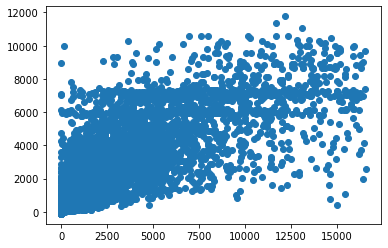

In [38]:
plt.scatter(y_test,y_pred)

In [39]:
#sns.distplot(y_test-y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
def train_and_evaluate(clf, X_train, y_train):
    
    clf.fit(X_train, y_train)
    
    print ("Coefficient of determination on training set:",clf.score(X_train, y_train))
    
    # create a k-fold cross validation iterator of k=5 folds
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(clf, X_train, y_train,cv=cv, n_jobs=-1)
    print('Cross Validation Score')
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
train_and_evaluate(gbr, X_train_std, y_train.ravel())

### Random Forrest Regressor

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
reg=RandomForestRegressor(n_estimators=100)

In [43]:
reg.fit(X_train_std, y_train.ravel())

RandomForestRegressor()

In [48]:
import pickle
pickle.dump(reg, open('rfreg_model.pkl', 'wb'))

In [44]:

print("Model Accuracy: %.3f" % reg.score(X_test_std, y_test))

Model Accuracy: 0.816


In [45]:
y_pred = reg.predict(X_test_std) 

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score( y_test,y_pred) 
print('r2 score for model is', r2)

r2 score for model is 0.8161265233140556


Text(0.5, 1.0, 'Test Values Vs Predicted Values')

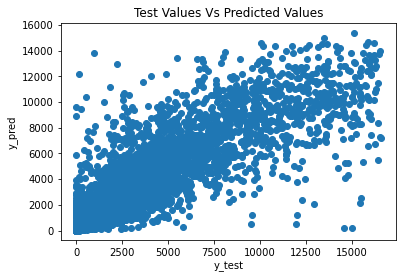

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Test Values Vs Predicted Values")

In [ ]:
y_pred=np.array(y_pred)
y_test=np.array(y_test)

In [ ]:
train_and_evaluate(reg, X_train_std, y_train.ravel())

In [ ]:
#plt.hist(y_test-y_pred)

### SVM


In [ ]:
#from sklearn import svm

In [ ]:
#clf = svm.SVC(kernel='linear') # Linear Kernel

In [ ]:
#clf.fit(X_train_std, y_train.ravel())